<a href="https://colab.research.google.com/github/MegaDewi2/Analisis-Sentimen-Acara-TV/blob/main/Gemastik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentimen_tayangan_tv.csv')
df

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7
...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...
396,397,negative,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...
397,398,negative,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,399,negative,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...


In [ ]:
df = df.drop(['Id'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sentiment       400 non-null    object
 1   Acara TV        400 non-null    object
 2   Jumlah Retweet  400 non-null    int64 
 3   Text Tweet      400 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


In [ ]:
lb = preprocessing.LabelBinarizer()
df['Sentiment'] = lb.fit_transform(df['Sentiment'])
df.head()

,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,1,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,1,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,1,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,1,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
df['Acara TV'].value_counts()

HitamPutihTransTV            100
MataNajwaMetroTV             100
KickAndyMetroTV              100
IndonesiaLawyersClubTvOne    100
Name: Acara TV, dtype: int64

1    200
0    200
Name: Sentiment, dtype: int64


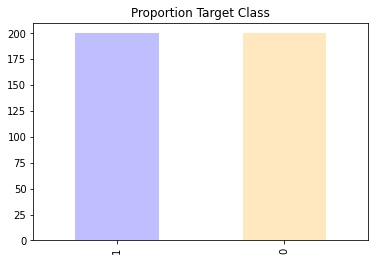

In [ ]:
print(df['Sentiment'].value_counts())
count_class=pd.value_counts(df['Sentiment'], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"], alpha = 0.25)
plt.title('Proportion Target Class')
plt.show()

In [ ]:
from collections import Counter
df['temp_list']=df['Text Tweet'].apply(lambda x: str(x).split())
top=Counter([word for li in df['temp_list'] for word in li])
temp_1=pd.DataFrame(top.most_common(20))
temp_1.columns=["most_common_words","frequency"]
temp_1.style.background_gradient(cmap='Blues')

,most_common_words,frequency
0,di,90
1,dan,53
2,yg,51
3,#kickandy,49
4,yang,42
5,#ILC,31
6,mata,31
7,ini,29
8,Mata,27
9,acara,25


In [ ]:
#true
from collections import Counter
count1 = Counter(" ".join(df[df['Sentiment']== 1]['Text Tweet']).\
                 split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)

#false
count2 = Counter(" ".join(df[df['Sentiment']== 0]['Text Tweet']).\
                 split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)

In [ ]:
df1 = df1.rename(columns={0: "common_words", 1 : "count"})
df2 = df2.rename(columns={0: "common_words", 1 : "count"})

Text(0.5, 1.0, 'Fake')

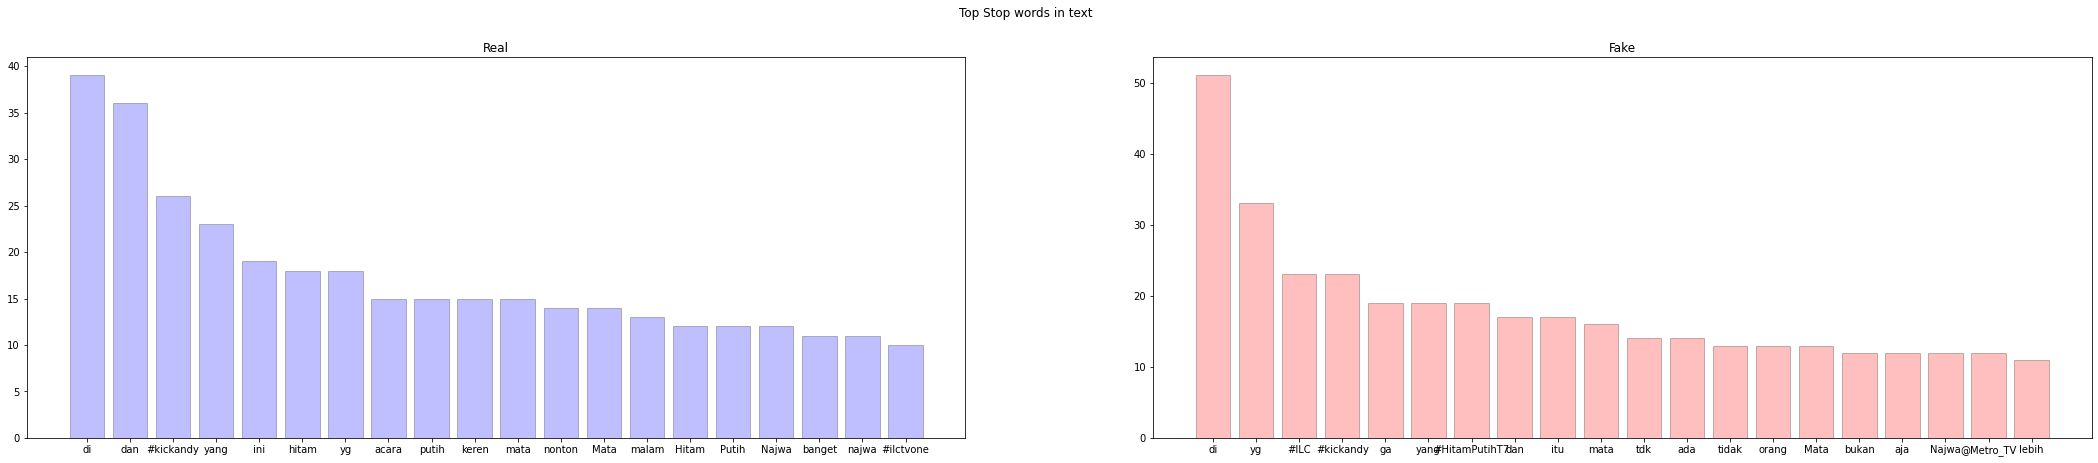

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(37,7))
fig.suptitle('Top Stop words in text')
ax1.bar(df1['common_words'], df1['count'], color='blue', alpha=0.25, edgecolor='black')
ax1.set_title("Real")

ax2.bar(df2['common_words'], df2['count'], color='red', alpha=0.25, edgecolor='black')
ax2.set_title("Fake")

In [ ]:
df.shape

(400, 5)

In [ ]:
def preprocess_text(data):
    stop = stopwords.words('indonesian')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    #Make lower
    data['Text Tweet'] = data['Text Tweet'].str.lower()
    #Remove stopwords
    data['Text Tweet'] = data['Text Tweet'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    #Remove punctuations
    data['Text Tweet'] = data['Text Tweet'].str.translate(str.maketrans('', '', punct))
    data['word_count'] = data['Text Tweet'].str.split().str.len()
    return data
df = preprocess_text(df)

In [ ]:
def pos_tag(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag,wordnet.NOUN)

In [ ]:
def lemmatize(data):
    lemmatizer=WordNetLemmatizer()
    data['Text Tweet'] = data['Text Tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w,pos_tag(w)) for w in word_tokenize(x)]))
    return data

df = lemmatize(df)

In [ ]:
df['Text Tweet'][:2]

0    undang nshanijkt48 hitamputih pemenang ssk jkt...
1    selamat berbuka puasa semoga amal ibadah ni di...
Name: Text Tweet, dtype: object

In [ ]:
positive = df['Text Tweet'][df['Sentiment']== 1]
negative = df['Text Tweet'][df['Sentiment']== 0]
stop = set(stopwords.words('indonesian'))
print(stop)

{'per', 'belakang', 'diakhiri', 'harus', 'sesegera', 'terkira', 'mungkin', 'bekerja', 'jawab', 'semuanya', 'sesampai', 'mengenai', 'diperkirakan', 'sebagainya', 'bisa', 'entah', 'karena', 'terlebih', 'menuju', 'ditanyai', 'melihatnya', 'menjawab', 'diakhirinya', 'depan', 'serta', 'yang', 'itulah', 'meminta', 'meski', 'jumlahnya', 'diperlukan', 'mendapatkan', 'dilihat', 'menunjukkan', 'begitulah', 'terutama', 'terakhir', 'malahan', 'mengatakan', 'dipertanyakan', 'manalagi', 'adanya', 'seorang', 'ketika', 'diibaratkannya', 'datang', 'tapi', 'mengatakannya', 'mengucapkan', 'sempat', 'berujar', 'diperbuatnya', 'semampu', 'diucapkan', 'ditegaskan', 'segalanya', 'setidaknya', 'keterlaluan', 'sekitar', 'bagian', 'seenaknya', 'kalaulah', 'terhadap', 'menaiki', 'cara', 'memberikan', 'padanya', 'perlukah', 'ternyata', 'diperbuat', 'diketahuinya', 'enggaknya', 'merupakan', 'seluruh', 'lebih', 'meskipun', 'dikarenakan', 'segera', 'adapun', 'segala', 'sebaik', 'satu', 'ke', 'sendirinya', 'seseorang

<function matplotlib.pyplot.show>

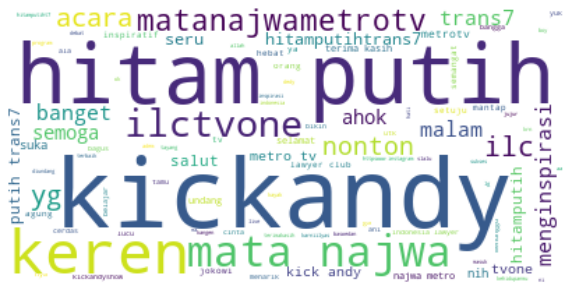

In [ ]:
plt.figure(figsize=(10,8))
pos = WordCloud(stopwords=stop, background_color='white').generate(' '.join(positive))
plt.imshow(pos, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

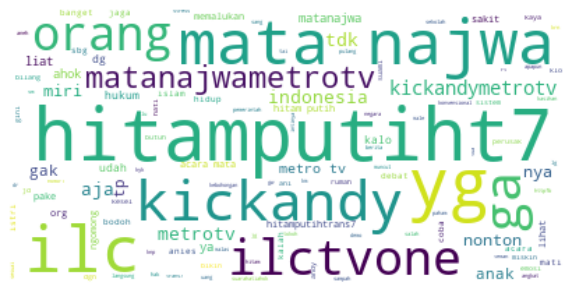

In [ ]:
plt.figure(figsize=(10,8))
neg = WordCloud(stopwords=stop, background_color='white').generate(' '.join(negative))
plt.imshow(neg, interpolation='bilinear')
plt.axis("off")
plt.show

In [ ]:
df.shape

(400, 6)

In [ ]:
X = df['Text Tweet']
Y = df['Sentiment']

## SVM

In [ ]:
feature_extraction = TfidfVectorizer()
x = feature_extraction.fit_transform(df["Text Tweet"].values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33  5]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.88      0.88      0.88        42

    accuracy                           0.88        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80



In [ ]:
ypred_prob = classifier.predict_proba(X_test)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, ypred_prob)

0.29846255208077144

In [ ]:
from sklearn.svm import SVC
rbf = SVC(kernel = 'rbf', random_state = 0, probability=True)
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred_rbf = rbf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

[[33  5]
 [10 32]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.86      0.76      0.81        42

    accuracy                           0.81        80
   macro avg       0.82      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



In [ ]:
ypredrbf_prob = rbf.predict_proba(X_test)
log_loss(y_test, ypredrbf_prob)

0.3220072876561003

In [ ]:
from sklearn.svm import SVC
poly = SVC(kernel = 'poly', random_state = 0, probability=True)
poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_poly = poly.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_poly))
print(classification_report(y_test,y_pred_poly))

[[38  0]
 [19 23]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        38
           1       1.00      0.55      0.71        42

    accuracy                           0.76        80
   macro avg       0.83      0.77      0.75        80
weighted avg       0.84      0.76      0.75        80



In [ ]:
ypredpol_prob = poly.predict_proba(X_test)
log_loss(y_test, ypredpol_prob)

0.4488629354188314

In [ ]:
from sklearn.svm import SVC
sig = SVC(kernel = 'sigmoid', random_state = 0, probability=True)
sig.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_sigmoid = sig.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_sigmoid))
print(classification_report(y_test,y_pred_sigmoid))

[[33  5]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.88      0.86      0.87        42

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



In [ ]:
ypredsig_prob = sig.predict_proba(X_test)
log_loss(y_test, ypredsig_prob)

0.30174698419053136

## SVM Tanpa TF IDF


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
#Feature Engineering
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
x_train_count = vectorizer.transform(x_train)
x_test_count  = vectorizer.transform(x_test)

In [ ]:
from sklearn.svm import SVC
classifier_t = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier_t.fit(x_train_count, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred_lt = classifier_t.predict(x_test_count)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_lt))
print(classification_report(Y_test,y_pred_lt))

[[27 11]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81        38
           1       0.78      0.95      0.86        42

    accuracy                           0.84        80
   macro avg       0.86      0.83      0.83        80
weighted avg       0.85      0.84      0.83        80



In [ ]:
ypredcl_prob = classifier_t.predict_proba(x_test_count)
log_loss(Y_test, ypredcl_prob)

0.3219105343441048

In [ ]:
from sklearn.svm import SVC
rbft = SVC(kernel = 'rbf', random_state = 0, probability=True)
rbft.fit(x_train_count, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred_rbft = rbft.predict(x_test_count)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_rbft))
print(classification_report(Y_test,y_pred_rbft))

[[22 16]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        38
           1       0.72      1.00      0.84        42

    accuracy                           0.80        80
   macro avg       0.86      0.79      0.79        80
weighted avg       0.86      0.80      0.79        80



In [ ]:
ypredrbft_prob = rbft.predict_proba(x_test_count)
log_loss(Y_test, ypredrbft_prob)

0.5718387346622509

In [ ]:
from sklearn.svm import SVC
polyt = SVC(kernel = 'poly', random_state = 0, probability=True)
polyt.fit(x_train_count, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred_polyt = polyt.predict(x_test_count)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_polyt))
print(classification_report(Y_test,y_pred_polyt))

[[ 4 34]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        38
           1       0.55      1.00      0.71        42

    accuracy                           0.57        80
   macro avg       0.78      0.55      0.45        80
weighted avg       0.77      0.57      0.46        80



In [ ]:
ypredpt_prob = polyt.predict_proba(x_test_count)
log_loss(Y_test, ypredpt_prob)

0.55413401826416

In [ ]:
from sklearn.svm import SVC
sigt = SVC(kernel = 'sigmoid', random_state = 0, probability=True)
sigt.fit(x_train_count, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred_sigt = sigt.predict(x_test_count)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_sigt))
print(classification_report(Y_test,y_pred_sigt))

[[30  8]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        38
           1       0.82      0.86      0.84        42

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80



In [ ]:
ypredsigt_prob = sigt.predict_proba(x_test_count)
log_loss(Y_test, ypredsigt_prob)

0.37682120147271386

In [ ]:
data = {'Kernel': ['Linear', 'RBF', 'Poly', 'Sigmoid'],
        'acc_tfidf' : [87.5, 81.25, 76.25, 86.25],
        'acc_non': [83.75, 80, 57.5, 82.5]}

df = pd.DataFrame(data)

df.head()

,Kernel,acc_tfidf,acc_non
0,Linear,87.50,83.75
1,RBF,81.25,80.00
2,Poly,76.25,57.50
3,Sigmoid,86.25,82.50


In [ ]:
dataloss = {'Kernel': ['Linear', 'RBF', 'Poly', 'Sigmoid'],
        'loss_tfidf' : [0.29, 0.32, 0.44, 0.30],
        'loss_non': [0.32, 0.57, 0.55, 0.37]}

df_loss = pd.DataFrame(dataloss)

df_loss.head()

,Kernel,loss_tfidf,loss_non
0,Linear,0.29,0.32
1,RBF,0.32,0.57
2,Poly,0.44,0.55
3,Sigmoid,0.30,0.37


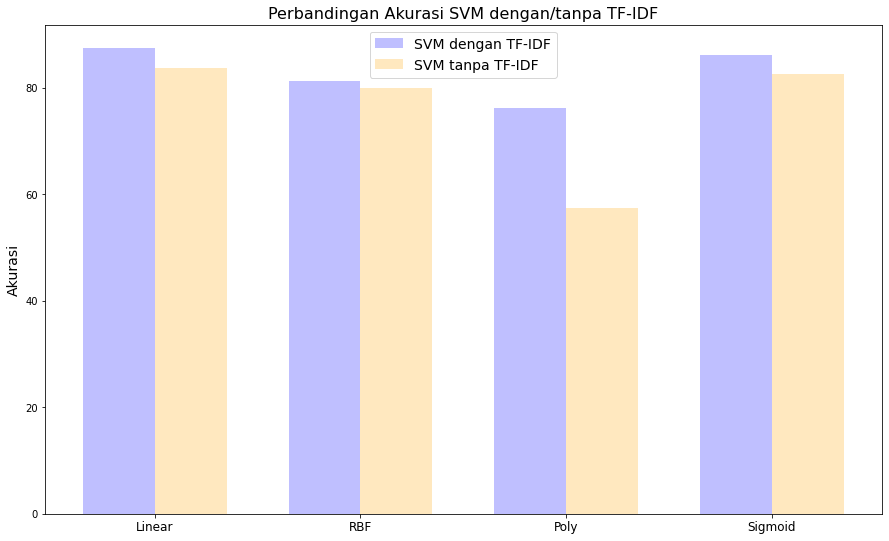

In [ ]:

kernel = ['Linear', 'RBF', 'Poly', 'Sigmoid']
tfidf = [87.5, 81.25, 76.25, 86.25]
nontfidf = [83.75, 80, 57.5, 82.5]

x = np.arange(len(kernel))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 9))

mhsa = ax.bar(x - width/2, tfidf, width, label='SVM dengan TF-IDF', color='blue', alpha=0.25)
mhsi = ax.bar(x + width/2, nontfidf, width, label='SVM tanpa TF-IDF', color='orange', alpha=0.25)

ax.set_title('Perbandingan Akurasi SVM dengan/tanpa TF-IDF', size=16)
ax.set_ylabel('Akurasi', size=14)
ax.set_xticks(x)
ax.set_xticklabels(kernel, size=12)
ax.legend(fontsize=14)

plt.show()

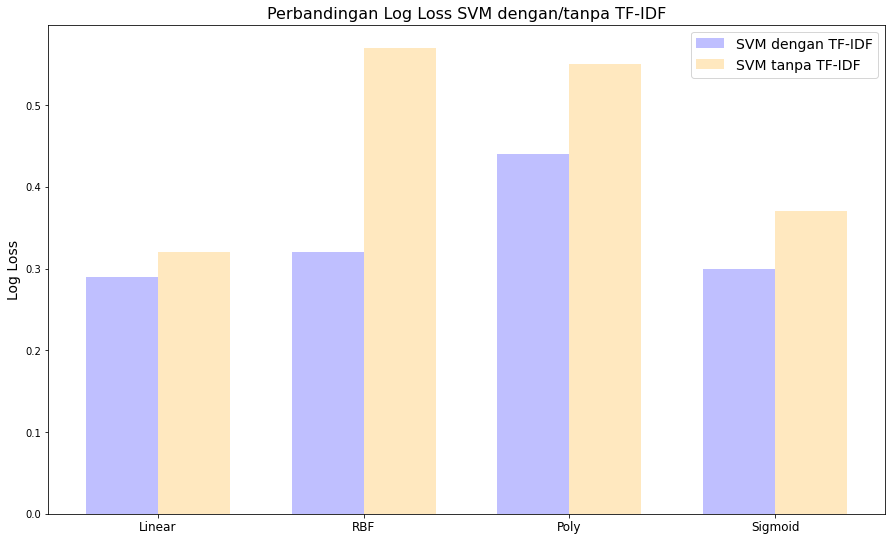

In [ ]:
kernel = ['Linear', 'RBF', 'Poly', 'Sigmoid']
tfidf = df_loss['loss_tfidf']
nontfidf = df_loss['loss_non']

x = np.arange(len(kernel))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 9))

mhsa = ax.bar(x - width/2, tfidf, width, label='SVM dengan TF-IDF', color='blue', alpha=0.25)
mhsi = ax.bar(x + width/2, nontfidf, width, label='SVM tanpa TF-IDF', color='orange', alpha=0.25)

ax.set_title('Perbandingan Log Loss SVM dengan/tanpa TF-IDF', size=16)
ax.set_ylabel('Log Loss', size=14)
ax.set_xticks(x)
ax.set_xticklabels(kernel, size=12)
ax.legend(fontsize=14)

plt.show()